In [ ]:
#This is a dataset of passageners of titanic ship and we have to predict what kind of people who were more
#likey to survive the ship crash

Importing all the **dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

Importing the dataset

In [ ]:
titanic = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Seprating Features and Labels

In [ ]:
x = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

Seprating categorical and numerical features

In [ ]:
x_num = x.select_dtypes(include=['int64','float64']).columns
x_cat = x.select_dtypes(include=['object']).columns

Checking for missing value

In [ ]:
print(x.isnull().sum())                                                         #Tells us that if imputation is needed

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Visualizing the data

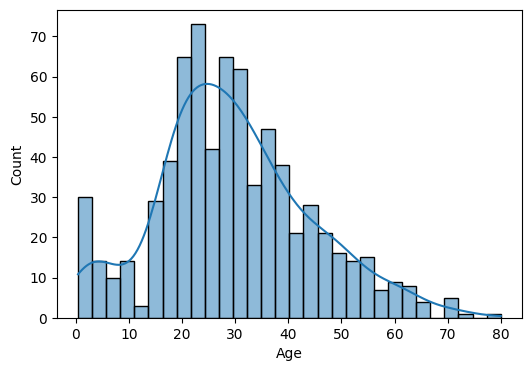

In [ ]:
plt.figure(figsize=(6,4))                                                        #Tells us that scaling is needed
sns.histplot(x['Age'],bins=30,kde=True)
plt.xlabel("Age")
plt.show()

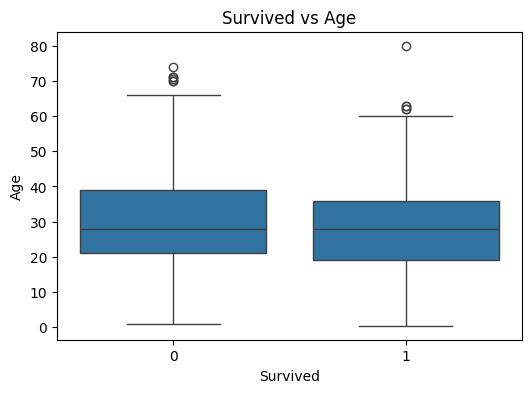

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=titanic)
plt.title("Survived vs Age")
plt.show()

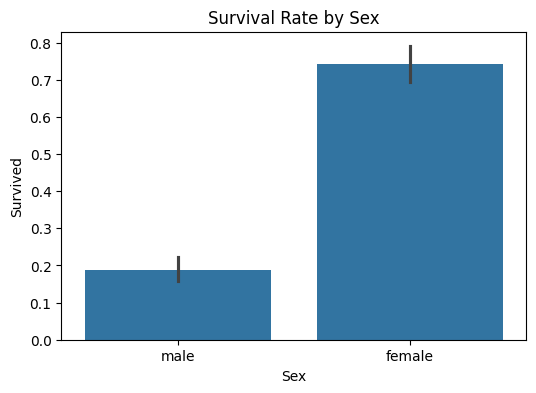

In [ ]:
plt.figure(figsize=(6,4))                                                       #Sex has a strong influence so it should be
sns.barplot(x="Sex", y="Survived", data=titanic)                                #onehotencoded
plt.title("Survival Rate by Sex")
plt.show()

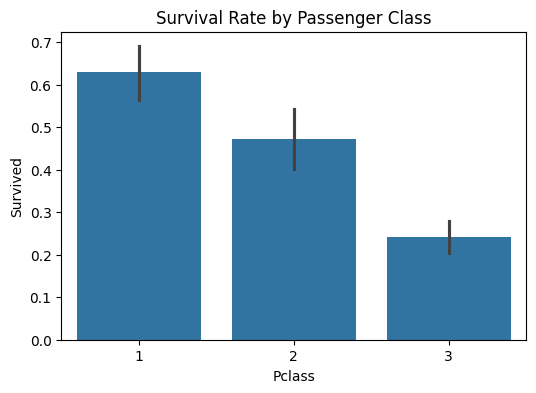

In [ ]:
plt.figure(figsize=(6,4))                                                       #Passenger class should be treated as categorical feature
sns.barplot(x="Pclass", y="Survived", data=titanic)                             # and onehot encoded
plt.title("Survival Rate by Passenger Class")
plt.show()

Creating pipeline for numerical and categorical transformations

In [ ]:
num_pipe = Pipeline([("imputer",SimpleImputer(strategy='mean')),
 ("StandardScaler",StandardScaler())])

cat_pipe = Pipeline([("imputer",SimpleImputer(strategy='most_frequent')),
            ("onehotencoder",OneHotEncoder(handle_unknown='ignore'))])

Combining categorical and numerical Pipelins using ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer([("num",num_pipe,x_num),("cat",cat_pipe,x_cat)])

Building Final Pipeline

In [ ]:
pipe = Pipeline([("preprocessor",preprocessor),
 ("model",RandomForestClassifier())])

Applying Cross Validation

In [ ]:
scores = cross_val_score(pipe,x,y,cv=5);


In [ ]:
print("accuracy", scores.mean())

accuracy 0.8148138848785388


Applying Hyperparameter tuning

In [ ]:
param_grid={
    'model__n_estimators':[100,200],
    'model__max_depth':[None,10]
}
grid=GridSearchCV(pipe,param_grid,cv=5)
grid.fit(x,y)


In [ ]:
print("BEST PAMAMETERS", grid.best_params_)

BEST PAMAMETERS {'model__max_depth': None, 'model__n_estimators': 200}
